# Analysis notebook for the post-experiment questionnaire results

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## General seaborn plot settings

In [2]:
palette = 'colorblind'
colors = sns.color_palette(palette)

sns.set_style('darkgrid') # set to seaborn theme
sns.despine(left=True, bottom=True)

matplotlib.rcParams.update({'font.size': 30, 'font.family': 'serif'})

<Figure size 432x288 with 0 Axes>

## Create the dataframe from the csv file and add condition columns

In [3]:
# Load the data
df = pd.read_csv('datasets/Questionnaire_results.csv')

# The second participant is excluded
df = df.drop(1)
df = df.reset_index()

# Add columns on conditions (in the same order as in Compliance_results.csv), not done automatically (must be improved in the future)
df.insert(4, 'Condition_gender', ['male', 'female', 'male', 'female', 'male', 'female', 'female', 'male'], True)
df.insert(5, 'Condition_speach',  ['authoritative', 'authoritative', 'neutral', 'neutral', 'authoritative', 'authoritative', 'neutral', 'neutral'], True)
df['Condition_combined'] = df['Condition_gender'] + df['Condition_speach']
df.insert(2, 'Participant', np.arange(1, 9), True)

# Uncomment if desired to see column names (keys) to access data
#df.keys()

## Rename the columns for better accessibility

Per default, the column headers are defined by the questions when a .csv file is obtained from Google forms. Since our questions belong to the seven different constructs usefulness, ease, attitude, intentions, reactance, beliefs, and like, the column headers are renamed with the respective construct and an additional number to have unique column headers.

In [4]:
old_names = df.keys()

# Define new names based on predefined construct groupings
new_names = ['index', 'Zeitstempel', 'Participant', 'Age', 'Gender', 'Condition_gender', 'Condition_speach', 
             'Understood_instruction', 'Usefulness1', 'Usefulness2', 'Usefulness3', 'Usefulness4', 'Ease1', 'Ease2', 
             'Attitude1', 'Attitude2', 'Intentions1', 'Reactance1', 'Reactance2', 'Reactance3', 'Beliefs1', 'Beliefs2', 
             'Beliefs3', 'Stress1', 'Like1', 'Like2', 'Like3', 'Like4', 'Like5', 'Like6', 'Like7', 'Like8', 'Like9', 
             'Like10', 'Like11', 'Condition_combined']

assert len(old_names) == len(new_names)

# create a dict to rename columns with
dict_naming = dict(zip(df.keys(), new_names))

# rename columns
df = df.rename(columns=dict_naming)

In [5]:
# First observation of the data (uncomment if desire to observe)
#df.head()

In [6]:
# Create links between construct columns (to group the questions later on according to the respective construct)
old = ['Usefulness1', 'Usefulness2', 'Usefulness3', 'Usefulness4', 'Ease1', 'Ease2', 'Attitude1', 'Attitude2', 
       'Intentions1', 'Reactance1', 'Reactance2', 'Reactance3', 'Beliefs1', 'Beliefs2', 'Beliefs3', 'Like1', 'Like2', 
       'Like3', 'Like4', 'Like5', 'Like6', 'Like7', 'Like8', 'Like9', 'Like10', 'Like11']

new = ['Usefulness'] * 4 + ['Ease'] * 2 + ['Attitude'] * 2 + ['Intentions'] + ['Reactance'] * 3 + ['Beliefs'] * 3 + ['Like'] * 11

# create a dict to rename columns with
dict_construct_group = dict(zip(old, new))

## Our participants

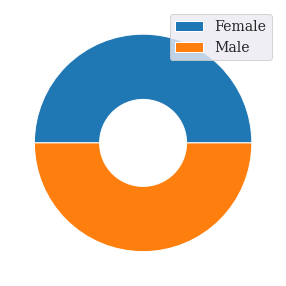

In [7]:
# Gender plot
data_gender_labels = np.unique(df['Gender'])
_, data_gender_cts = np.unique(df.replace(['Female', 'Male', 'Other'], [0, 1, 2])['Gender'], return_counts=True)

# Pieplot general
plt.figure(figsize=(5,5))
plt.pie(data_gender_cts)

# White circle in the middle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Save and plot figure
plt.legend(data_gender_labels, prop={'size': 14})
# plt.savefig('Plots/gender_circle.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

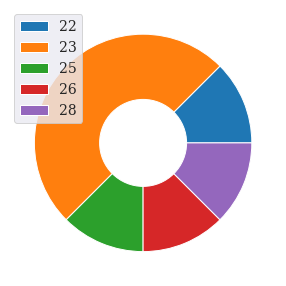

In [8]:
# Age plot
data_age_labels, data_age_cts = np.unique(df['Age'], return_counts=True)

plt.figure(figsize=(5, 5))
plt.pie(data_age_cts)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(data_age_labels, prop={'size': 14})
# plt.savefig('Plots/age_circle.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

## Exploratory Analysis: Create columns with mean and standard deviation per participant and overall per construct

This is not a completely meaningful analysis of our results but served to understand and work correctly with the dataframe and to give us general ideas on the results from the questionnaire.

In [9]:
usefulness_columns = ['Usefulness1', 'Usefulness2', 'Usefulness3', 'Usefulness4']
ease_columns = ['Ease1', 'Ease2']
attitude_columns = ['Attitude1', 'Attitude2']
intentions_columns = ['Intentions1']
reactance_columns = ['Reactance1', 'Reactance2', 'Reactance3']
beliefs_columns = ['Beliefs1', 'Beliefs2', 'Beliefs3']
like_columns = ['Like1', 'Like2', 'Like3', 'Like4', 'Like5', 'Like6', 'Like7', 'Like8', 'Like9', 'Like10', 'Like11']

### 1. Per participant

For each participant, calculate the mean and standard deviation of the answers to those questions that belong to a specific construct.

In [10]:
def get_mean_and_sd_from_columns(dataframe, column_names):
    """
    Calculates mean and standard deviation (sd) for each participant based on multiple columns.
    
    dataframe: the current dataframe
    column_names: names of the columns to get means and std from
    """
    
    return dataframe[column_names].mean(axis=1), dataframe[column_names].std(axis=1)

In [11]:
# Create mean and standard deviation for construct groups/ latent variables
df['Usefulness_mean'], df['Usefulness_sd'] = get_mean_and_sd_from_columns(df, usefulness_columns)
df['Ease_mean'], df['Ease_sd'] = get_mean_and_sd_from_columns(df, ease_columns)
df['Attitude_mean'], df['Attitude_sd'] = get_mean_and_sd_from_columns(df, attitude_columns)
df['Intentions_mean'], df['Intentions_sd'] = get_mean_and_sd_from_columns(df, intentions_columns)
df['Reactance_mean'], df['Reactance_sd'] = get_mean_and_sd_from_columns(df, reactance_columns)
df['Beliefs_mean'], df['Beliefs_sd'] = get_mean_and_sd_from_columns(df, beliefs_columns)
df['Like_mean'], df['Like_sd'] = get_mean_and_sd_from_columns(df, like_columns)

# Show first rows of dataframe for control (columns of interest are on the far right)
df.head()

,index,Zeitstempel,Participant,Age,Gender,Condition_gender,Condition_speach,Understood_instruction,Usefulness1,Usefulness2,...,Attitude_mean,Attitude_sd,Intentions_mean,Intentions_sd,Reactance_mean,Reactance_sd,Beliefs_mean,Beliefs_sd,Like_mean,Like_sd
0,0,2022/01/31 10:35:06 AM MEZ,1,25,Female,male,authoritative,3,8,7,...,9.0,1.414214,8.0,NaN,3.333333,3.511885,8.333333,1.527525,6.363636,1.206045
1,2,2022/01/31 4:26:02 PM MEZ,2,23,Male,female,authoritative,10,6,7,...,6.5,4.949747,9.0,NaN,4.333333,3.785939,5.000000,4.358899,4.181818,2.638870
2,3,2022/01/31 5:23:01 PM MEZ,3,22,Male,male,neutral,10,9,10,...,7.5,0.707107,8.0,NaN,2.333333,1.527525,8.000000,1.000000,7.454545,1.863525
3,4,2022/01/31 6:23:24 PM MEZ,4,23,Female,female,neutral,3,6,6,...,9.0,1.414214,9.0,NaN,0.666667,1.154701,9.333333,0.577350,7.909091,1.375103
4,5,2022/01/31 7:33:32 PM MEZ,5,28,Male,male,authoritative,8,2,5,...,7.5,3.535534,7.0,NaN,4.000000,2.645751,6.000000,3.464102,7.000000,1.612452


### 2. Overall

Repeat a similar process, but now calculate the statistics for the constructs averaged over all participants.

In [12]:
def get_overall_stats(dataframe, column_names):
    """
    Calculates the mean, standard deviation (sd), skewness and kurtosis of 
    multiple columns for all participants.
    
    dataframe: the current dataframe
    column_names: names of the columns to get means and std from
    """
    
    stacked = dataframe[column_names].stack()
    
    return round(stacked.mean(), 2), round(stacked.std(), 2), round(stacked.skew(), 2), round(stacked.kurtosis(), 2)

In [13]:
# Usefulness
usefulness_mean, usefulness_sd, usefulness_skew, usefulness_kurtosis = get_overall_stats(df, usefulness_columns)

# Ease
ease_mean, ease_sd, ease_skew, ease_kurtosis = get_overall_stats(df, ease_columns)

# Attitude
attitude_mean, attitude_sd, attitude_skew, attitude_kurtosis = get_overall_stats(df, attitude_columns)

# Intentions
intentions_mean, intentions_sd, intentions_skew, intentions_kurtosis = get_overall_stats(df, intentions_columns)

# Reactance
reactance_mean, reactance_sd, reactance_skew, reactance_kurtosis = get_overall_stats(df, reactance_columns)

# Beliefs
beliefs_mean, beliefs_sd, beliefs_skew, beliefs_kurtosis = get_overall_stats(df, beliefs_columns)

# Like
like_mean, like_sd, like_skew, like_kurtosis = get_overall_stats(df, like_columns)

In [14]:
df_stats = pd.DataFrame()
df_stats['Construct'] = ['Usefulness', 'Ease', 'Attitude', 'Intentions', 'Reactance', 'Beliefs', 'Like']
df_stats['M'] = [usefulness_mean, ease_mean, attitude_mean, intentions_mean, reactance_mean, beliefs_mean, like_mean]
df_stats['SD'] = [usefulness_sd, ease_sd, attitude_sd, intentions_sd, reactance_sd, beliefs_sd, like_sd]
df_stats['Skewness'] = [usefulness_skew, ease_skew, attitude_skew, intentions_skew, reactance_skew, beliefs_skew, like_skew]
df_stats['Kurtosis'] = [usefulness_kurtosis, ease_kurtosis, attitude_kurtosis, intentions_kurtosis, reactance_kurtosis, beliefs_kurtosis, like_kurtosis]


df_stats

,Construct,M,SD,Skewness,Kurtosis
0,Usefulness,6.16,3.04,-0.53,-0.79
1,Ease,7.81,2.54,-0.69,-1.27
2,Attitude,7.56,2.25,-0.49,-0.79
3,Intentions,7.75,1.04,-0.39,-0.45
4,Reactance,2.29,2.33,1.08,0.11
5,Beliefs,7.38,2.37,-1.17,0.69
6,Like,7.23,2.14,-0.96,0.75


## Plots for paper

Here, the code for the plots that are created for the documentation is defined.

In [15]:
# prepare dataframe for boxplot
df_temp_melted = pd.melt(df,
                   id_vars=['Condition_gender', 'Condition_speach', 'Condition_combined'],
                   value_vars= usefulness_columns + ease_columns + attitude_columns + intentions_columns + reactance_columns + beliefs_columns + like_columns, # TODO make nicer
                   var_name='Attribute',
                   value_name='Value')

df_temp_melted['Construct'] = df_temp_melted['Attribute'].replace(dict_construct_group)

df_temp_melted.head()

,Condition_gender,Condition_speach,Condition_combined,Attribute,Value,Construct
0,male,authoritative,maleauthoritative,Usefulness1,8,Usefulness
1,female,authoritative,femaleauthoritative,Usefulness1,6,Usefulness
2,male,neutral,maleneutral,Usefulness1,9,Usefulness
3,female,neutral,femaleneutral,Usefulness1,6,Usefulness
4,male,authoritative,maleauthoritative,Usefulness1,2,Usefulness


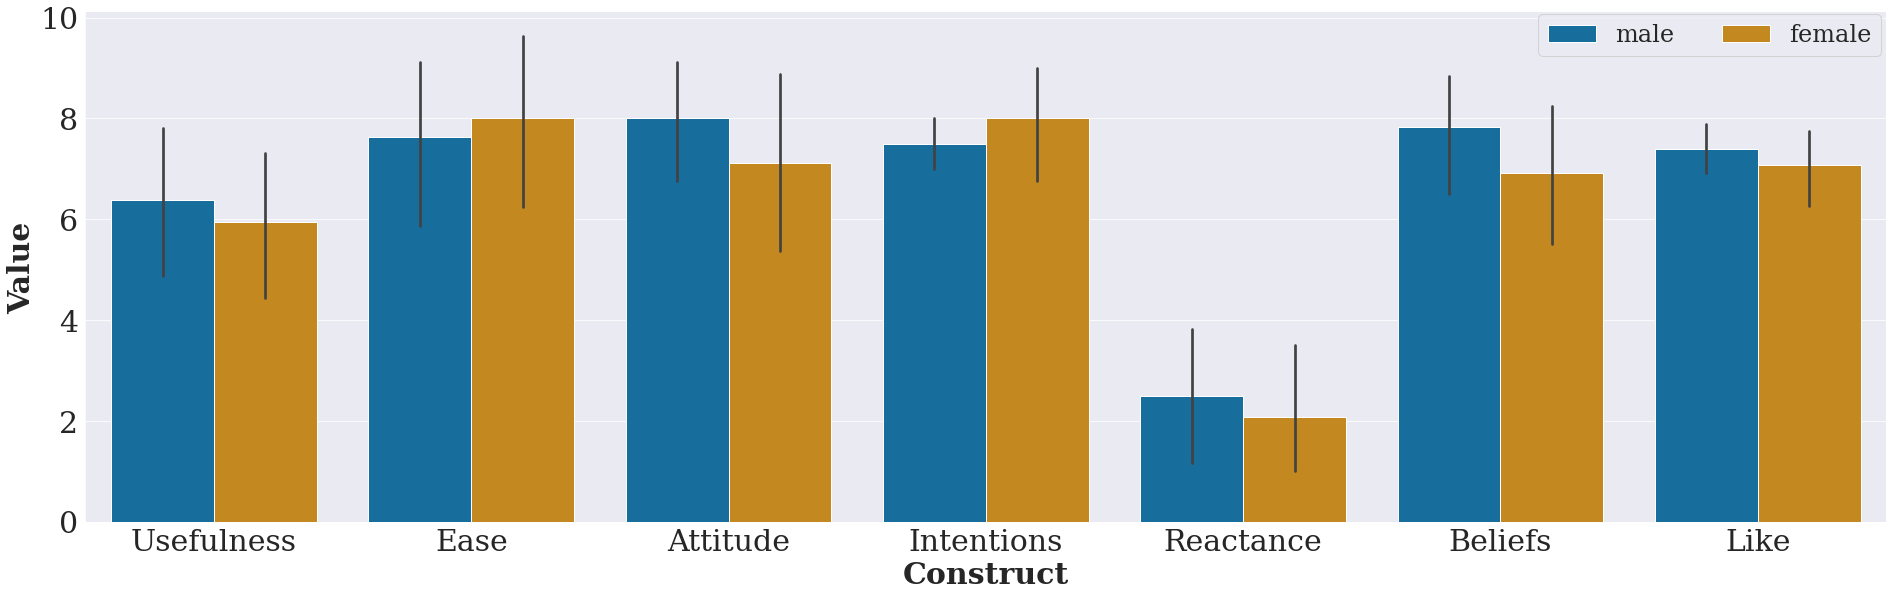

In [16]:
#
plot = sns.catplot(data=df_temp_melted,
            kind='bar',
            x='Construct',
            y='Value',
            hue='Condition_gender',
            palette=palette,
            height=9, 
            aspect=3,
            legend=False)

plt.legend(prop={'size': 24}, bbox_to_anchor=(0.8,0.89), ncol=2, shadow=False)
plt.xlabel('Construct', font={'weight': 'bold'})
plt.ylabel('Value', font={'weight': 'bold'})
plt.xticks([0,1,2,3,4,5,6], ['Usefulness', 'Ease', 'Attitude', 'Intentions', 'Reactance', 'Beliefs', 'Like'])
plt.yticks(np.arange(0, 12, 2))
plt.tight_layout()
#plt.savefig('Plots/plot_construct_gender.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

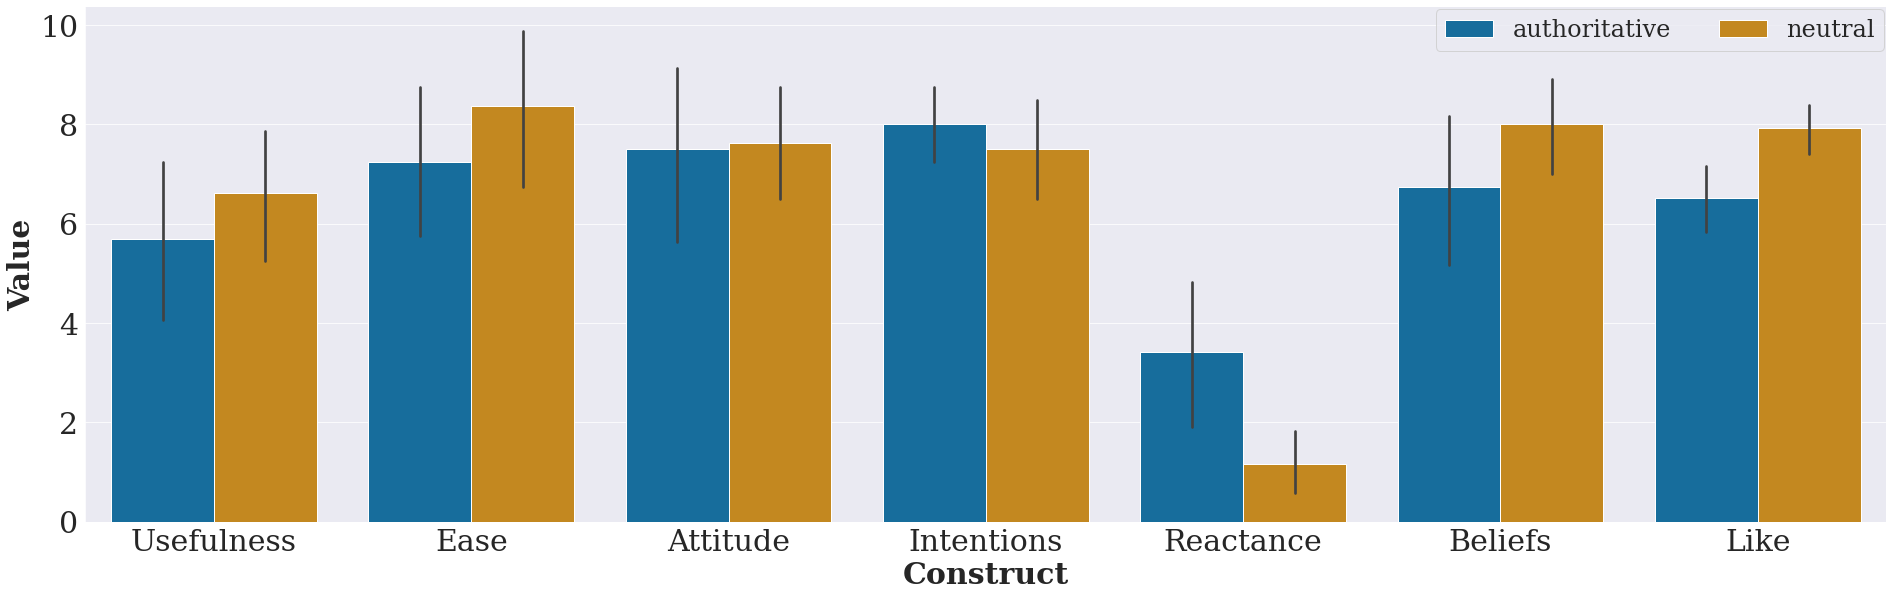

In [17]:
#
sns.catplot(data=df_temp_melted,
            kind='bar',
            x='Construct',
            y='Value',
            hue='Condition_speach',
            palette=palette,
            height=9, 
            aspect=3,
            legend=False)

plt.legend(prop={'size': 24}, bbox_to_anchor=(0.743,0.89), ncol=2, shadow=False)
plt.xlabel('Construct', font={'weight': 'bold'})
plt.ylabel('Value', font={'weight': 'bold'})
plt.yticks(np.arange(0, 12, 2))
plt.tight_layout()
#plt.savefig('Plots/plot_construct_speech.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

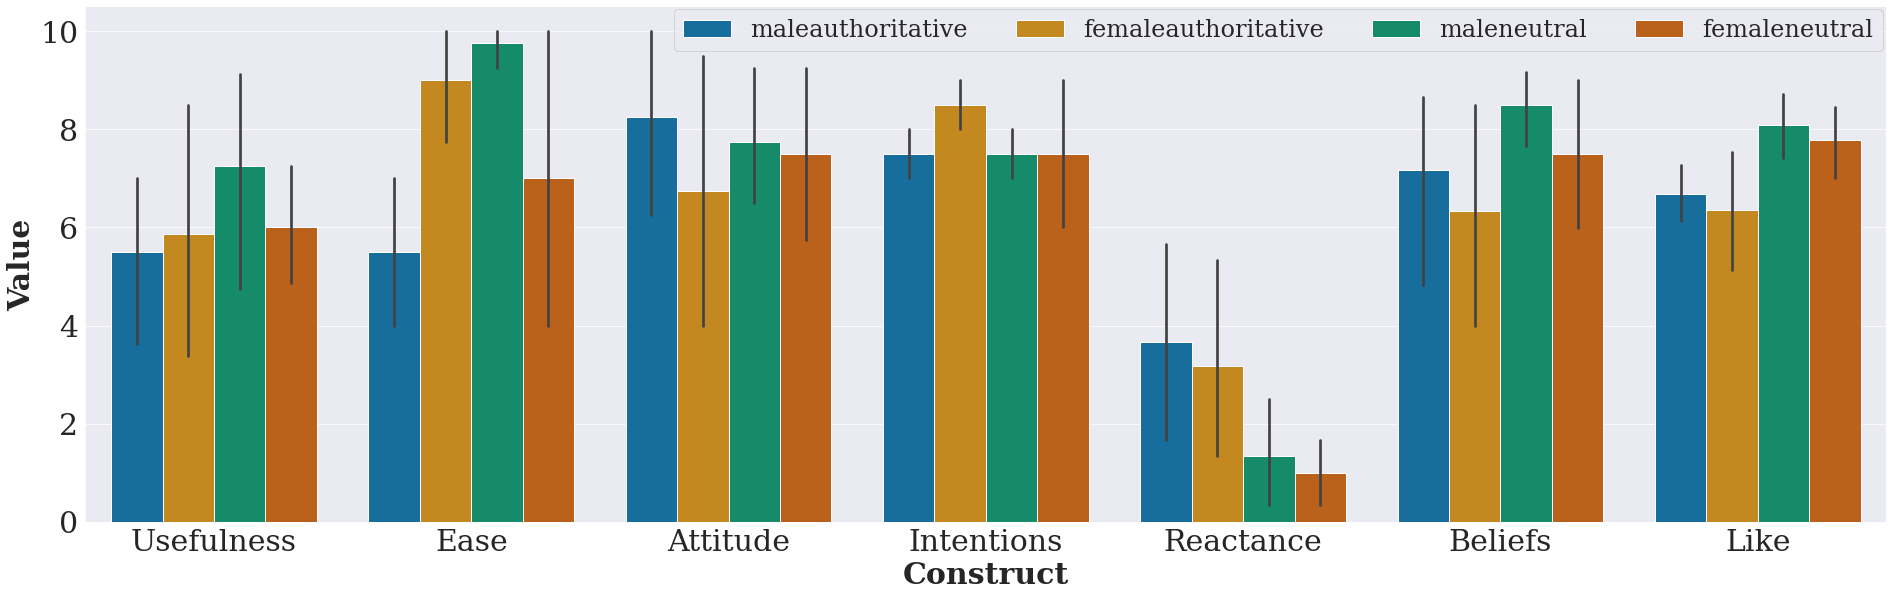

In [18]:
#
sns.catplot(data=df_temp_melted,
            kind='bar',
            x='Construct',
            y='Value',
            hue='Condition_combined',
            palette=palette,
            height=9, 
            aspect=3,
            legend=False)

plt.legend(prop={'size': 24}, ncol=4, bbox_to_anchor = (0.32,0.89), shadow=False)
plt.xlabel('Construct', font={'weight': 'bold'})
plt.ylabel('Value', font={'weight': 'bold'})
plt.yticks(np.arange(0, 12, 2))
plt.tight_layout()
#plt.savefig('Plots/plot_construct_combined.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

## Observing some statistics
Here, we observe compare the results over all questions between the different conditions.

The only informative measurement is the mean of standard deviations (sds) which is an indicator of how similar participants in one condition answered all questions. This can show the agreement of the answers within each condition. All other displayed measures (mean, median, etc.) are not meaningful since some question have negative and other have positive intentions.

In [25]:
def get_some_stats(dataframe, column_names):
    """
    """
    # filter the relevant part of the dataframe
    new_dataframe = dataframe[dataframe['Condition_gender'] == 'male']
    stacked = new_dataframe[column_names]
    
    return round(stacked.std(), 2)

In [26]:
# Usefulness
sds = get_some_stats(df, usefulness_columns + ease_columns+ attitude_columns + intentions_columns + reactance_columns + beliefs_columns + like_columns)
np.mean(sds)

1.6346153846153846